In [59]:
import numpy as np  # Is a dependency for many of our other libraries 
# It is still useful for np,sort() -> to sort the values in an array
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

import seaborn as sns # Datasets for use with Pandas Dataframe
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV # it allows us to define a grid of parameters that will be searched using K-fold cross-validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score # 
from sklearn.metrics import confusion_matrix
#import compute class weight


## Data description

This exercise is based on subset of data for the ["Give Me Some Credit" Kaggle competition] (https://www.kaggle.com/c/GiveMeSomeCredit), follow this link and take a look at the competition description.

### Getting the data
Dowload the data file called `credit_scoring_sample.csv` from https://github.com/Yorko/mlcourse.ai/tree/master/data


### Data columns
Not all of these columns are present in the sample data we user for this exercise

 - **SeriousDlqin2yrs** (prediction target) - Person experienced 90 days past due delinquency or worse 
 - **RevolvingUtilizationOfUnsecuredLines** - Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
 - **age** - Age of borrower in years
 - **DebtRatio** - Monthly debt payments, alimony, living costs divided by monthly gross income
 - **MonthlyIncome** - Monthly income
 - **NumberOfOpenCreditLinesAndLoans** - Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
 - **NumberRealEstateLoansOrLines** - Number of mortgage and real estate loans including home equity lines of credit
 - **NumberOfDependents** - Number of dependents in family excluding themselves (spouse, children etc.)
 - **NumberOfTimes90DaysLate** - Number of times borrower has been 90 days or more past due.
 - **NumberOfTime60-89DaysPastDueNotWorse**	 - Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
 - **NumberOfTime30-59DaysPastDueNotWorse** - Number of times borrower has been 30-59 days past due but no worse in the last 2 years.


In [60]:
df = pd.read_csv('credit_scoring_sample.csv', sep=';')

In [61]:
df.head().T # Formatted version so we can visualize the data more easily


,0,1,2,3,4
SeriousDlqin2yrs,0.000000,0.0,0.000000,0.00000,1.00000
age,64.000000,58.0,41.000000,43.00000,49.00000
NumberOfTime30-59DaysPastDueNotWorse,0.000000,0.0,0.000000,0.00000,0.00000
DebtRatio,0.249908,3870.0,0.456127,0.00019,0.27182
NumberOfTimes90DaysLate,0.000000,0.0,0.000000,0.00000,0.00000
NumberOfTime60-89DaysPastDueNotWorse,0.000000,0.0,0.000000,0.00000,0.00000
MonthlyIncome,8158.000000,NaN,6666.000000,10500.00000,400.00000
NumberOfDependents,0.000000,0.0,0.000000,2.00000,0.00000


#### How many columns and samples do we have in this dataset?

In [62]:
# How many rows and columns are in the dataset?
df.shape

(45063, 8)

#### How many people in this dataset had serious delinquency?
 - It's the first column `SeriousDlqin2yrs`
 - This is the column we will be trying to predict today

In [63]:
dlqCounts = df["SeriousDlqin2yrs"].value_counts()

#### Plot the bar chart of the SeriousDlqin2yrs column showing the number of people with serious delinquency (`label 1`) and those without (`label 0`)

<Axes: xlabel='SeriousDlqin2yrs'>

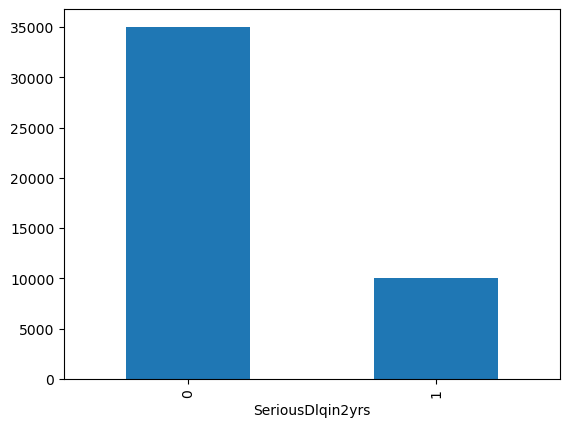

In [64]:
dlqCounts.plot(kind='bar') 
 # In matplotlib hist() for a histogram / bar graph

#### The bar chart shows that the data is imbalaced. That is the number of people with serious delinquency is much less than those without.

<img src="./assets/unbalanced.webp" width="600" hight="300" /> 

#### What accuracy score would you expect from the optimistic classifier that expects no delinquency at all?
 - This is our `dummy` classifier that predicts 0 for all samples
 - This is called the Null accuracy
 - Verify that accuracy score using the `accuracy_score()` function


In [65]:
y_pred = [0] * len(df)
# Print (y_pred)

y_actual = df.SeriousDlqin2yrs
accuracy_resulted = accuracy_score(y_actual, y_pred) * 100
print(str(accuracy_resulted) + "%")

77.75114839225084%


#### Calculate the precision, recall and F1 score of the optimistic classifier

### Precision - precision_score(실제값 예측값)
precision_score(실제값, 예측값) 을 비교하여 정밀도를 계산합니다 
정밀도는 예측한 양성 샘플중 실제로 양성인 샘플의 비율을 나타냅니다 - * 100 정밀도를 백분율로 변환합니다

### recall - recall_score(실제값 예측값)
재현율은 실제 양성 샘플중에서 예측이 양성인 샘플의 비율을 나타냅니다 

### f1_score(실제값, 예측값) 
f1 점수는 정밀도와 재현율의 조화 평균으로 두 지표의 균형을 평가합니다

In [66]:
precision_resulted = precision_score(y_actual, y_pred, zero_division=True) * 100 # zero_division=True -> to avoid division by zero
print(precision_resulted)
recall_resulted = recall_score(y_actual, y_pred) * 100
print(recall_resulted)
f1_score_resulted = f1_score(y_actual, y_pred) * 100
print(f1_score_resulted)



# Advantage of using precision, recall and F1 compared to accuracy:
# TODO : Required Homework - Look lecture notes 

100.0
0.0
0.0


#### Are there any columns with missing (NaN) values?
Hint: isnull()

In [67]:
whichIsNull = df.isnull()   # This muste return boolean
print(whichIsNull)

# Check How many have null values? 
numOfNullCells = whichIsNull.sum()
print(numOfNullCells)

       SeriousDlqin2yrs    age  NumberOfTime30-59DaysPastDueNotWorse  \
0                 False  False                                 False   
1                 False  False                                 False   
2                 False  False                                 False   
3                 False  False                                 False   
4                 False  False                                 False   
...                 ...    ...                                   ...   
45058             False  False                                 False   
45059             False  False                                 False   
45060             False  False                                 False   
45061             False  False                                 False   
45062             False  False                                 False   

       DebtRatio  NumberOfTimes90DaysLate  \
0          False                    False   
1          False                    False   


#### Fill in all the missing values using the median value of the corresponding column
Hint: fillna()

In [68]:
replacement = {"MonthlyIncome": df.MonthlyIncome.median(),
               "NumberOfDependents" : df.NumberOfDependents.median()} 
df.fillna(replacement, inplace=True)
df.isnull().sum() # Double check after the replacement if you still have null values


SeriousDlqin2yrs                        0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
NumberOfTimes90DaysLate                 0
NumberOfTime60-89DaysPastDueNotWorse    0
MonthlyIncome                           0
NumberOfDependents                      0
dtype: int64

#### Define X and y to experiment with some classifiers below

In [69]:
# We will be using all the columns except the target to base our preidctions on # Feature engineering - ALl we've done is choose all features
# This is the list of the columns
features_chosen = df.columns[1:].tolist()
print(features_chosen)

['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'MonthlyIncome', 'NumberOfDependents']


In [70]:
X = df[features_chosen] # Use the list of feature names to cut only the feature columns and save into X
print(X)
y = df.SeriousDlqin2yrs  # We purposefully needed to choose the label/answer. Note : THis was not automatcially the first column in our dataset
print(y)


       age  NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  \
0       64                                     0     0.249908   
1       58                                     0  3870.000000   
2       41                                     0     0.456127   
3       43                                     0     0.000190   
4       49                                     0     0.271820   
...    ...                                   ...          ...   
45058   31                                     0     0.824725   
45059   49                                     0  6530.000000   
45060   38                                     0     0.475841   
45061   47                                     1     0.485198   
45062   45                                     2     0.802982   

       NumberOfTimes90DaysLate  NumberOfTime60-89DaysPastDueNotWorse  \
0                            0                                     0   
1                            0                                     0   
2  

#### Train a LogesticRegression model using ALL the data and find the accuracy_score
#### Set `max_iter=1000` in the LogisticRegression constructor to avoid a warning message


#### Call this model as `base model`

Hint: There is no need to split the data

In [ ]:
model_base = LogisticRegression(max_iter=1000)
# Train the model using the data
model_base.fit(X, y)

#  Test the model
y_pred_base = model_base.predict(X)
# 학습된 모델을 사용하여 입력데이터 x에 대한 예측을 수행합니다. 예측결과는 y_pred_base에 저장됩니다
accuracy_result =  accuracy_score(y, y_pred_base) * 100

# 실제 타켓 레이블 y와 예측된 레이블 y_pred_base를 비교하여 정확도를 계산합니다. 정확도는 전체 샘플중에서 올바르게 예측된 샘플의 비율을 나타냅니다
print(str(accuracy_result) + "%")

80.02352262388212%


#### How many people in the prediction has serious delinquency (`Label 1`)?

In [75]:
print(y_pred_base) # This is the predictiion of the model

sum_del_preds = y_pred_base.sum()  # This is the sum of the predictions
print(sum_del_preds)

sum_non_dlq_preds = y_pred_base[y == 0].sum()  # this is the sum of the predictions where the actual value is 0
print(sum_non_dlq_preds)

[0 0 0 ... 0 0 0]
1924
450


#### How much better was the LogisticRegression model compared to the Null in terms of accuracy?

In [ ]:
 # 3% improvement 


#### Evaluate the base model using the confusion_matrix

<img src="./assets/confusion_compatible.png" width="600" hight="300" /> 

In [76]:
confusion_matrix(y, y_pred_base)


array([[34587,   450],
       [ 8552,  1474]], dtype=int64)

#### Evaluate the base model using precision, recall and F1 score 

In [77]:
precision_result = precision_score(y, y_pred_base) * 100
print(f"precision : {precision_result}")
recall_result = recall_score(y, y_pred_base) * 100
print(f"recall : {recall_result}")
f1_score_result = f1_score(y, y_pred_base) * 100
print(f"f1_score : {f1_score_result}")

precision : 76.61122661122661
recall : 14.701775384001595
f1_score : 24.669456066945607


#### Running the logistic regression model with different `class_weight`

#### For class 0 (no delinquency) set the weight to 1 and for class 1 (delinquency) set the weight to 2 - we give higher weight to the minority class


#### Call this model as `model_weighted`


In [79]:
# Instead of using the default weights for the LG algorithm, we can use the class_weight parameter to assign weights to the classes
model_weighted = LogisticRegression(max_iter=1000, class_weight={0: 1, 1: 2}) # Ml Parameters Art rather than science

# Train
model_weighted.fit(X, y)

# Test
y_pred_weighted = model_weighted.predict(X) # Don't want to give the answers to the prediction so that we can compare
accuracy_result = accuracy_score(y, y_pred_weighted) * 100
print(str(accuracy_result) + "%")
...

82.1583116969576%


Ellipsis

#### Evaluate the weighted model using the confusion_matrix, precision, recall and F1 score

In [82]:
confusion_matrix(y, y_pred_weighted)

array([[33116,  1921],
       [ 6119,  3907]], dtype=int64)

In [83]:
precision_result = precision_score(y, y_pred_weighted) * 100
print(f"precision : {precision_result}")
recall_result = recall_score(y, y_pred_weighted) * 100
print(f"recall : {recall_result}")
f1_score_result = f1_score(y, y_pred_weighted) * 100
print(f"f1_score : {f1_score_result}")

precision : 67.03843514070007
recall : 38.96868142828646
f1_score : 49.28724612085278


#### Compare and Contrast the results of the `weighted model` with the `base model`

In [ ]:
# Improvement ? Yes
# Because we're seeing a bettwe representation of the less frequently occuring class

#### Repeat the above with different values of `w` in the range between 1 and 10. Plot the accuracy score as a function of `w` label 1's weight


[1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.8002352262388212, 0.821583116969576, 0.7840578745312119, 0.7118922397532343, 0.6378847391429776, 0.5738632581053192, 0.5205822958968556, 0.4734039012049797, 0.42855557774671016]


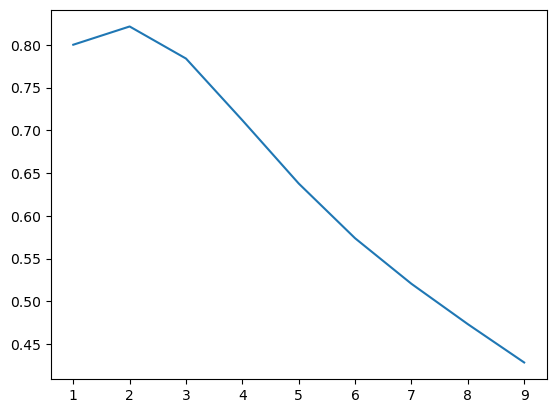

In [ ]:
# Use for.. in a loop in python over range 1-10
weights = list(range(1, 10))  # Cast as list to put the values in a list

# 가중치 리스트 생성 
print(weights)
accuracy_scores = []

# This will likely be useful for you in the future to choose appropriate weights fro logistic Regression -- please review here

for num1_10 in range(1, 10):
  model_range_weighted = LogisticRegression(max_iter=1000, class_weight={0: 1, 1: num1_10})
  model_range_weighted.fit(X, y)
  # We could have calculated accuracy here directly, lets try mean accuracy instead -> method score() for logisticRegression class
  mean_accuracy = model_range_weighted.score(X, y) # Unless the other metrics , you dont need to calculate pred yourself first - it can do it within the method 
  accuracy_scores.append(mean_accuracy)

print(accuracy_scores)
plt.plot(weights, accuracy_scores)


#### Based on the plot of scores, what is the best value for label 1 weight?

In [85]:
# Best value weight for deliquints = 2

#### Scikit Learn also has a function called `compute_class_weight` that automatically computes the weights based on the class distribution. 

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
classes = np.array([0, 1])  # In the deliquints column we only have 0-not dlqn, 1-yes dlqn
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weights # We can see that it takes our origianl guess of 0:1 , 1:2 and makes it more specific 0:0.64, 1:2.24

array([0.64307732, 2.247307  ])

#### Make a logestic regression model with the computed class weights and evaluate it using the confusion_matrix, precision, recall and F1 score


#### Call this model as `auto_weighted model`

In [89]:
model_balanced = LogisticRegression(max_iter=1000, class_weight={0: class_weights[0], 1: class_weights[1]})
model_balanced.fit(X, y)
y_pred_balanced = model_balanced.predict(X)
accuracy_result = accuracy_score(y, y_pred_balanced) * 100
print(str(accuracy_result) + "%")

74.99278787475312%


In [91]:
preceision_result = precision_score(y, y_pred_balanced) * 100
print(f"precision : {preceision_result}")
recall_result = recall_score(y, y_pred_balanced) * 100
print(f"recall : {recall_result}")
f1_score_result = f1_score(y, y_pred_balanced) * 100
print(f"f1_score : {f1_score_result}")

precision : 45.624780007039774
recall : 64.64193097945342
f1_score : 53.493458792455954


#### Compare and Contrast the results of the `auto_weighted model` with the `weighted model`

#### Which model has higher type 1 error? and which model has higher type 2 error?

<img src="./assets/confusion_error_type.png" width="600" hight="300" /> 

In [ ]:
# I.e. which predicted the most incorrect for the minority class
# Answer : The first model (Recall was lowest)

# which predicted the most incorrect for the majority class
# Answer : The last model (Precision was lowest)

#### If we want to give people very large amount of credit, which model should we use? and why?

In [ ]:
# if we want to give people too much credit, which model should we sue?
# Answer : The first model (Recall was highest)

# if we want to give people an Appropriate amount of credit, which model should we use?
# Answer : The last model (Precision was highest)

#### Useful Resources to read about classification metrics
 - Use [Kavin Markham's notebook](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) as reference